<a href="https://colab.research.google.com/github/Bimal999/python/blob/main/Copy_of_Missing_values_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: /content/hr.csv
100% 580k/580k [00:00<00:00, 77.7MB/s]


In [64]:
import pandas as pd

df=pd.read_csv('hr.csv')


In [65]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [30]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [32]:
df.shape

(15004, 11)

In [33]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

In [66]:
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
14999,False,False,False,False,False,False,False,False,False,False,True
15000,False,False,False,False,False,False,False,False,False,False,True
15001,False,False,False,False,False,False,False,False,False,False,False
15002,False,False,False,False,False,False,False,False,False,False,True


# Fill missing values in 'age' column with the mean

In [67]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [68]:

mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)


In [69]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,27.018506
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.000000
2,0.45,0.45,2,154,3,1,1,0,support,medium,27.018506
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,27.018506
4,0.14,0.54,5,275,4,1,0,0,sales,high,27.018506


# Fill missing values in 'Department' column with the mode

In [70]:
mode_department = df['Department'].mode()[0]  # mode() returns a series, so we take the first value
df['Department'].fillna(mode_department, inplace=True)




# Fill missing values in 'salary' column with the mode

In [71]:

mode_salary = df['salary'].mode()[0]
df['salary'].fillna(mode_salary, inplace=True)

In [72]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,27.018506
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.000000
2,0.45,0.45,2,154,3,1,1,0,support,medium,27.018506
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,27.018506
4,0.14,0.54,5,275,4,1,0,0,sales,high,27.018506


#Data visualizatin


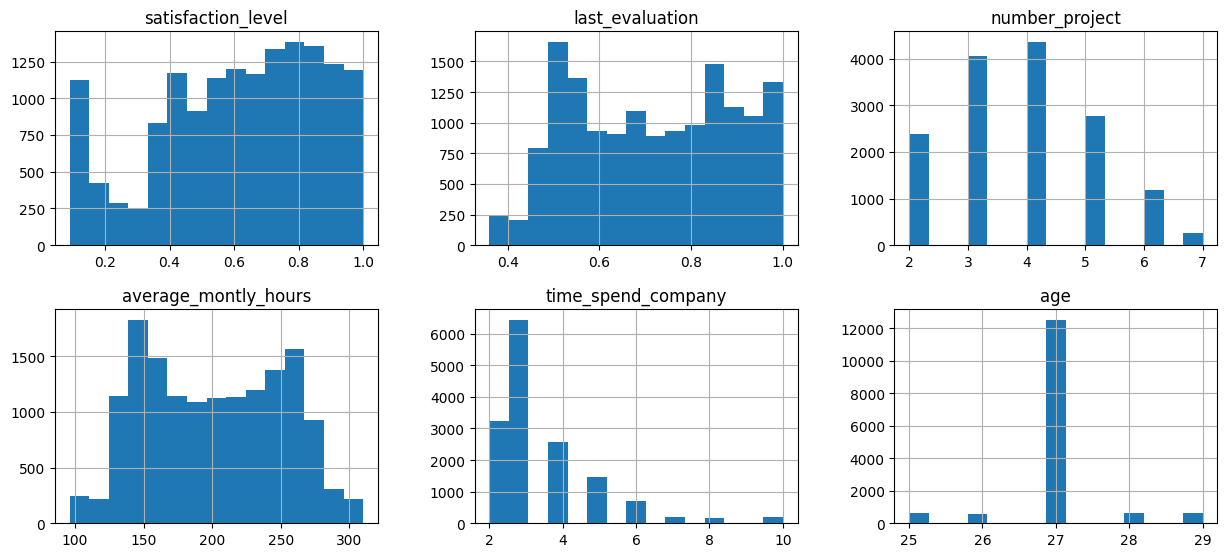

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'age']

# Plot histograms
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.show()


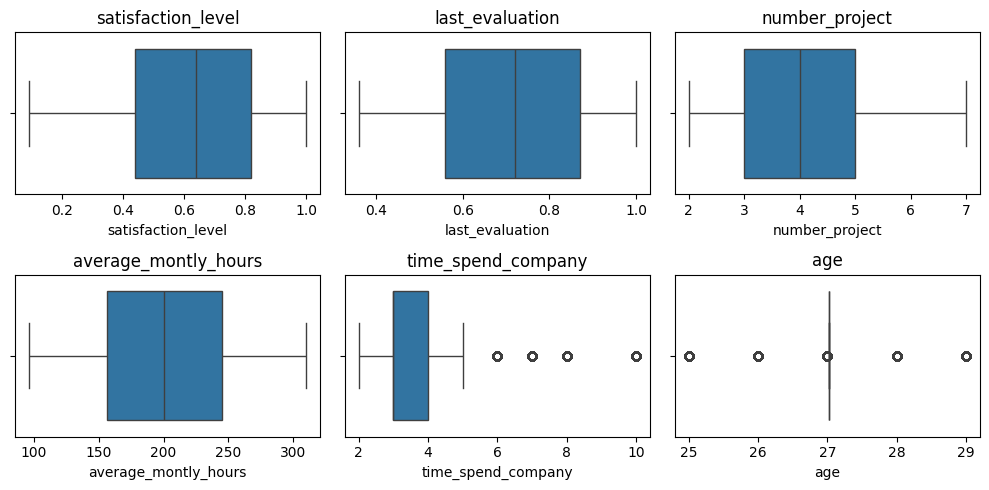

In [44]:
# Plot box plots
plt.figure(figsize=(10, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


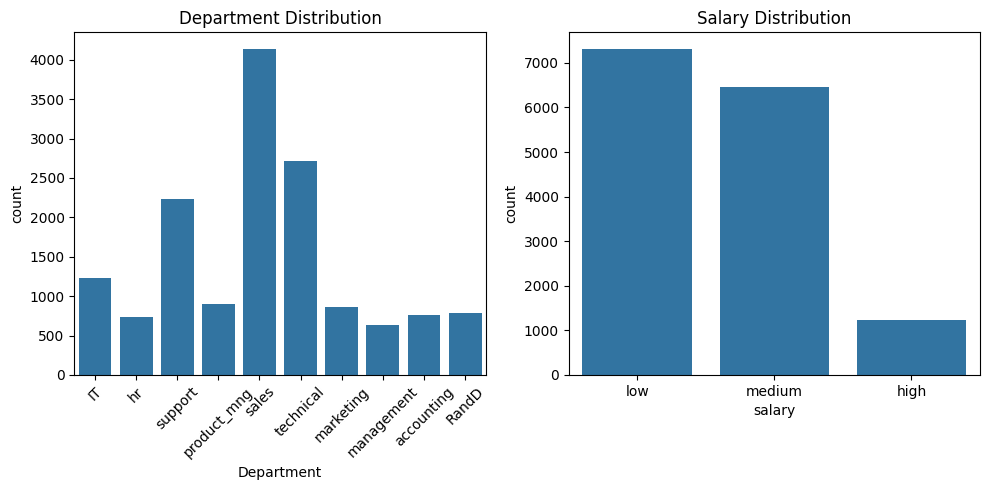

In [47]:
# Plot count plots for categorical features
plt.figure(figsize=(10, 5))

# Department
plt.subplot(1, 2, 1)
sns.countplot(x='Department', data=df)
plt.title('Department Distribution')
plt.xticks(rotation=45)

# Salary
plt.subplot(1, 2, 2)
sns.countplot(x='salary', data=df)
plt.title('Salary Distribution')

plt.tight_layout()
plt.show()


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [75]:


# Prepare the data
X = df.drop('left', axis=1)
y = df['left']

In [76]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [77]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,27.018506
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.000000
2,0.45,0.45,2,154,3,1,1,0,support,medium,27.018506
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,27.018506
4,0.14,0.54,5,275,4,1,0,0,sales,high,27.018506


In [79]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
12896,0.47,0.71,2,241,4,0,0,27.018506,False,False,False,False,False,False,True,False,False,True,False
5902,0.58,0.59,4,224,3,0,0,27.018506,False,False,False,False,False,False,True,False,False,False,False
9462,0.16,0.46,6,240,2,0,0,27.018506,False,False,False,False,False,True,False,False,False,True,False
1572,0.56,0.57,2,112,4,0,0,27.018506,False,False,False,True,False,False,False,False,False,False,True
13585,0.53,0.97,4,249,3,0,0,27.018506,False,False,False,False,False,False,True,False,False,False,True


In [82]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
3595,0.57,0.72,3,202,3,1,0,27.018506,False,False,False,False,False,False,False,True,False,False,True
884,0.86,0.51,3,185,2,0,0,29.000000,False,False,False,False,False,False,False,False,True,False,True
6350,0.76,0.71,3,205,2,0,0,27.018506,False,False,False,False,False,False,False,True,False,False,True
5697,0.70,0.63,3,157,4,0,0,27.000000,False,False,False,False,False,False,True,False,False,False,True
1491,0.85,0.57,5,190,2,1,0,27.018506,False,False,False,False,False,False,False,False,True,False,True


#Sir X_train.head() garda extra column kaha dekhi aayo ??


In [56]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3434
           1       0.65      0.38      0.48      1067
           ?       0.00      0.00      0.00         1

    accuracy                           0.80      4502
   macro avg       0.49      0.44      0.45      4502
weighted avg       0.79      0.80      0.78      4502



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
